In [21]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns 
import statsmodels.api as sm
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import os
import graphviz

import matplotlib.font_manager as fm

for f in fm.fontManager.ttflist:
    if 'NanumBarunGothic' in f.fname:
        plt.rcParams['font.family'] = 'NanumBarunGothic' # 폰트를 나눔고딕으로
print(plt.rcParams['font.family'])
matplotlib.rcParams['axes.unicode_minus'] = False #'-'기호 제대로 나오게함

['NanumBarunGothic']


In [2]:
df_breast = pd.read_csv("../data/cancer.csv",engine = 'python')
df_breast.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df_breast_x = df_breast.drop("diagnosis",axis = 1)
df_breast_y = df_breast["diagnosis"]
df_breast_x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
x= df_breast_x
y= df_breast_y
x_tr,x_test,y_tr,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1234)

print("train data x size : {}".format(x_tr.shape))
print("train data y size : {}".format(y_tr.shape))
print("test data x size : {}".format(x_test.shape))
print("test data y size : {}".format(y_test.shape))

train data x size : (398, 30)
train data y size : (398,)
test data x size : (171, 30)
test data y size : (171,)


In [7]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(x_tr,y_tr)
print("Accurary on training set:{:.3f}".format(tree_uncustomized.score(x_tr,y_tr)))
print("Accurary on test set:{:.3f}".format(tree_uncustomized.score(x_test,y_test)))



Accurary on training set:1.000
Accurary on test set:0.930


In [8]:
train_accuracy = []
test_accuracy = []

para_criterion = ["gini","entropy"]

for criterion in para_criterion:
    tree1 = DecisionTreeClassifier(criterion= criterion, random_state= 1234)
    tree1.fit(x_tr,y_tr)
    train_accuracy.append(tree1.score(x_tr,y_tr))
    test_accuracy.append(tree1.score(x_test,y_test))

ds_accuracy1 = pd.DataFrame()
ds_accuracy1["Criterion"] = para_criterion
ds_accuracy1["TrainAccuracy"] = train_accuracy
ds_accuracy1["TestAccuracy"] = test_accuracy
ds_accuracy1.round(3)


,Criterion,TrainAccuracy,TestAccuracy
0,gini,1.0,0.93
1,entropy,1.0,0.93


In [10]:
# 깊이 변경
train_accuracy = []; test_accuracy=[]
para_criterion = []; para_max_depth = []

n_iter_depth = 10

list_criterion = ['gini','entropy']

for criterion in list_criterion:
    for depth in range(1,n_iter_depth+1):
        tree2 = DecisionTreeClassifier(criterion=criterion, max_depth=depth,random_state=1234)
        tree2.fit(x_tr,y_tr)
        train_accuracy.append(tree2.score(x_tr,y_tr))
        test_accuracy.append(tree2.score(x_test,y_test))
        para_criterion.append(criterion)
        para_max_depth.append(depth)
        
ds_accuracy2 = pd.DataFrame()
ds_accuracy2["Criterion"] = para_criterion
ds_accuracy2["Depth"] = para_max_depth
ds_accuracy2["TrainAccuracy"] = train_accuracy
ds_accuracy2["TestAccuracy"] = test_accuracy
ds_accuracy2.round(3)


,Criterion,Depth,TrainAccuracy,TestAccuracy
0,gini,1,0.932,0.877
1,gini,2,0.960,0.924
2,gini,3,0.977,0.936
3,gini,4,0.990,0.942
4,gini,5,0.992,0.953
5,gini,6,0.995,0.936
6,gini,7,0.997,0.959
7,gini,8,1.000,0.930
8,gini,9,1.000,0.930
9,gini,10,1.000,0.930


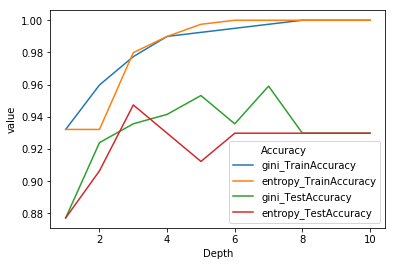

In [11]:
# 자기자신에만 영향을 받는 과적합상태
ds_accuracy2_melt = pd.melt(ds_accuracy2,id_vars=["Criterion","Depth"])
ds_accuracy2_melt["Accuracy"]=ds_accuracy2_melt["Criterion"]+ "_" + ds_accuracy2_melt["variable"]
sns.lineplot(x="Depth",y="value",hue = "Accuracy", data = ds_accuracy2_melt)

In [13]:
train_accuracy = []; test_accuracy = []

para_criterion = []; para_max_depth=[];para_min_leaf_size = []
# 최대깊이 10
max_depth= 10

list_min_leaf_size = [i*10 for i in range(1,6)]

for criterion in list_criterion:
    for leafsize in list_min_leaf_size:
        tree3 = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth,min_samples_leaf=leafsize,random_state=1234)

        tree3.fit(x_tr,y_tr)
        train_accuracy.append(tree3.score(x_tr,y_tr))
        test_accuracy.append(tree3.score(x_test,y_test))
        para_criterion.append(criterion)
        para_max_depth.append(max_depth)
        para_min_leaf_size.append(leafsize)

ds_accuracy3 = pd.DataFrame()
ds_accuracy3["Criterion"]= para_criterion
ds_accuracy3["Depth"] = para_max_depth
ds_accuracy3["MinLeafSize"] = para_min_leaf_size
ds_accuracy3["TrainAccuracy"] = train_accuracy
ds_accuracy3["TestAccuracy"] = test_accuracy
ds_accuracy3.round(3)


,Criterion,Depth,MinLeafSize,TrainAccuracy,TestAccuracy
0,gini,10,10,0.955,0.924
1,gini,10,20,0.940,0.877
2,gini,10,30,0.937,0.865
3,gini,10,40,0.932,0.877
4,gini,10,50,0.932,0.877
5,entropy,10,10,0.967,0.959
6,entropy,10,20,0.932,0.877
7,entropy,10,30,0.932,0.877
8,entropy,10,40,0.932,0.877
9,entropy,10,50,0.932,0.877


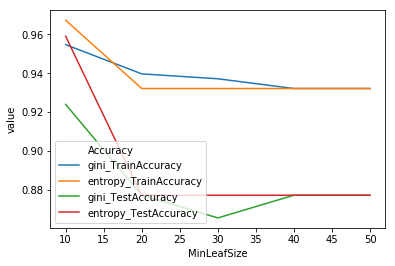

In [14]:
ds_accuracy3_melt = pd.melt(ds_accuracy3, id_vars=["Criterion","Depth","MinLeafSize"])
ds_accuracy3_melt["Accuracy"] = ds_accuracy3_melt["Criterion"] + "_" + ds_accuracy3_melt["variable"]
sns.lineplot(x="MinLeafSize",y="value",hue = "Accuracy", data= ds_accuracy3_melt)

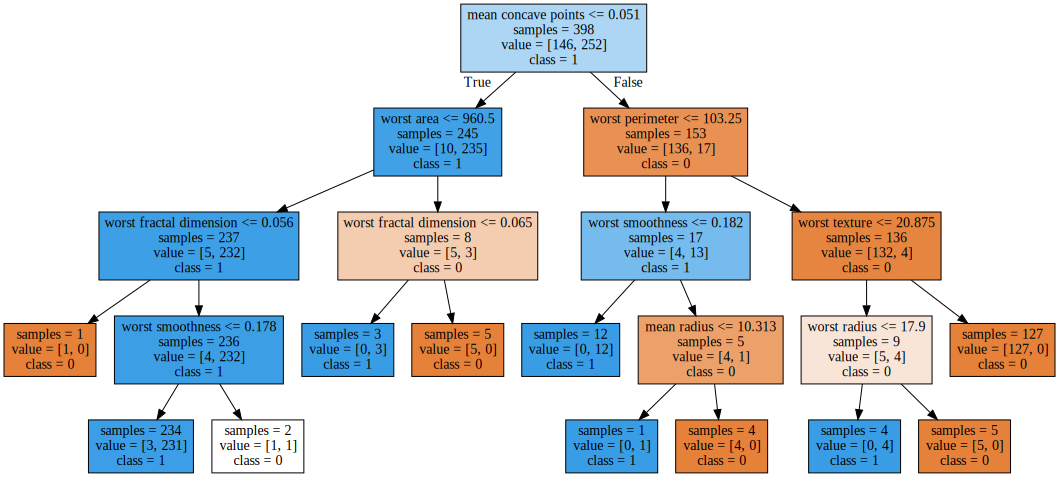

In [16]:
tree = DecisionTreeClassifier(criterion="gini",max_depth=4,random_state=1234)

tree.fit(x_tr,y_tr)

export_graphviz(tree,out_file="tree.dot",class_names=["0","1"],feature_names=x_tr.columns,impurity = False, filled = True)

# graphviz2.38 다운받는 경로
os.environ["PATH"] += os.pathsep + "./"

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


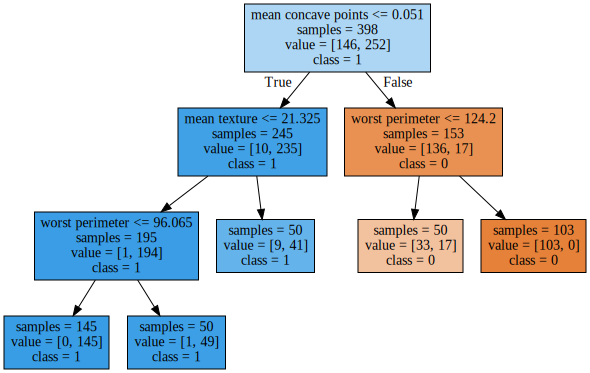

In [17]:
tree4 = DecisionTreeClassifier(criterion= "gini",max_depth=4,min_samples_leaf=50,random_state=1234)
tree5 = tree4.fit(x_tr,y_tr)
export_graphviz(tree5,out_file = "tree2.dot",class_names=["0","1"],feature_names= x_tr.columns,impurity = False, filled = True)

with open("tree2.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


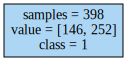

In [18]:
tree4 = DecisionTreeClassifier(criterion="gini",max_depth=4,min_samples_leaf= 200,random_state=1234)
tree5 = tree4.fit(x_tr,y_tr)

export_graphviz(tree5,out_file="tree3.dot",class_names=["0","1"],feature_names=x_tr.columns,impurity = False, filled=True)

with open("tree3.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

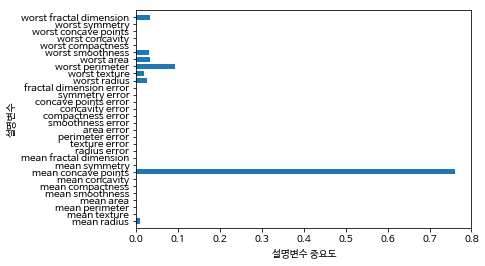

In [22]:
# 결론도출
ds_feature_importance = pd.DataFrame()
ds_feature_importance["Feature"] = x_tr.columns
ds_feature_importance["Importance"] = tree.feature_importances_

ds_feature_importance.sort_values("Importance",ascending = False)
ds_feature_importance.round(3)

def plot_feature_importances(model):
    n_features = x_tr.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align = "center")
    plt.yticks(np.arange(n_features),x_tr.columns)
    plt.xlabel("설명변수 중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1,n_features)

plot_feature_importances(tree)